In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, , VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import joblib, scipy, sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
df.drop(['ID'],axis=1,inplace=True)

In [6]:
df.shape

(418, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [8]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


## Checking for percentage of null data in each column

In [9]:
df.isnull().sum() / len(df) * 100

N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

## Checking for duplicate data

In [10]:
df[df.duplicated()]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


## Exploratory Data Analysis

N_Days
Skewness: 0.4726020506759292
Kurtosis: -0.4821388331042038


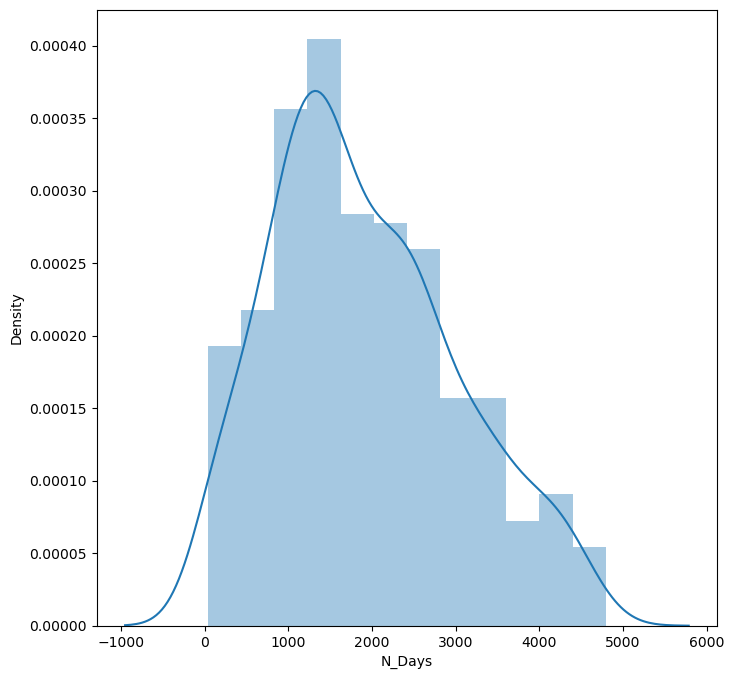

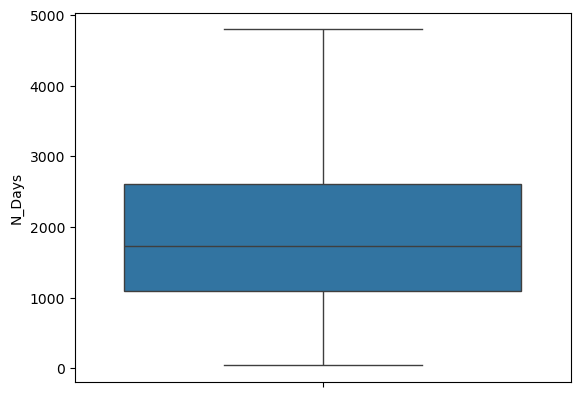

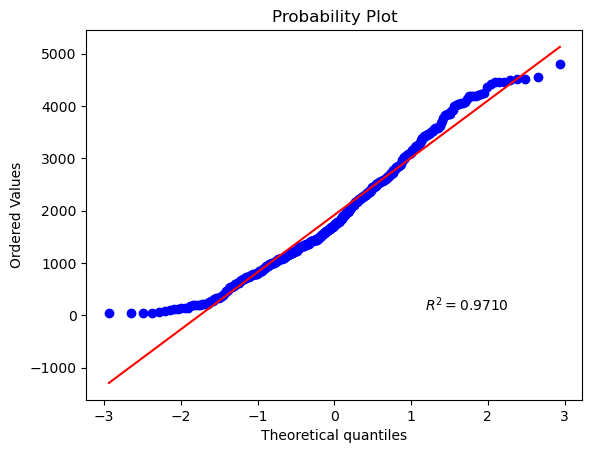

----------------------------
Age
Skewness: 0.08685015608405514
Kurtosis: -0.616730132346194


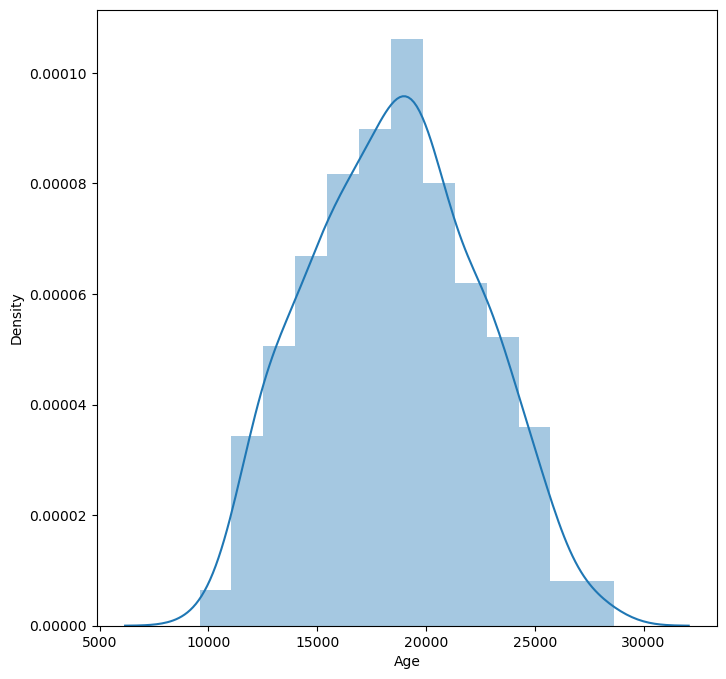

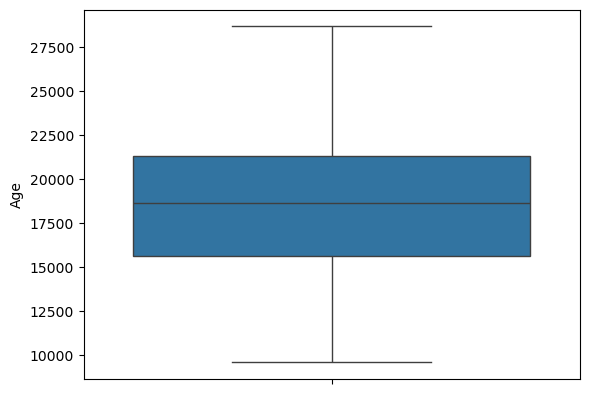

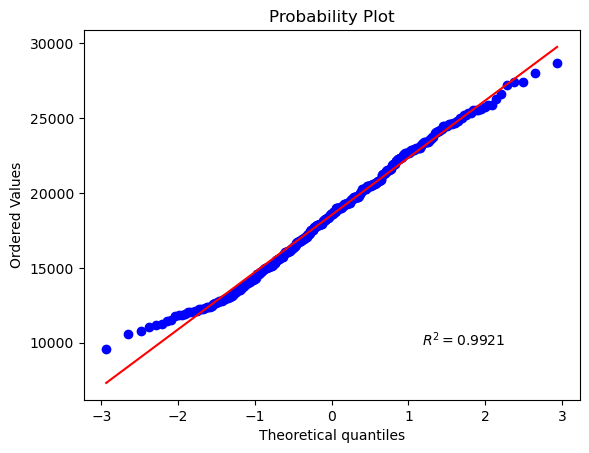

----------------------------
Bilirubin
Skewness: 2.717610708740455
Kurtosis: 8.065335678744502


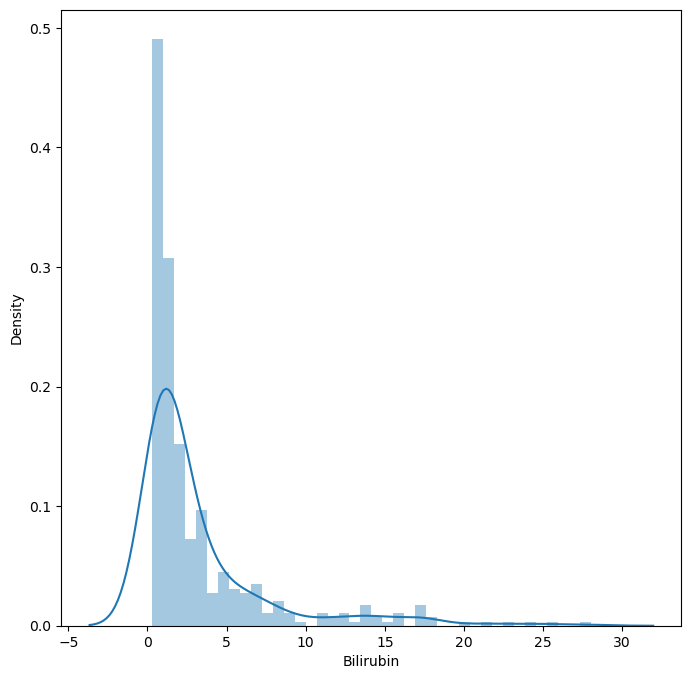

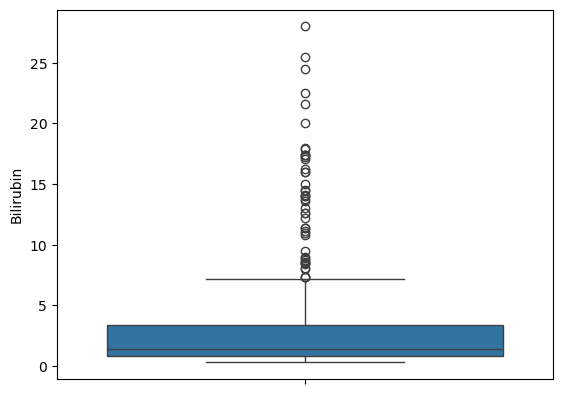

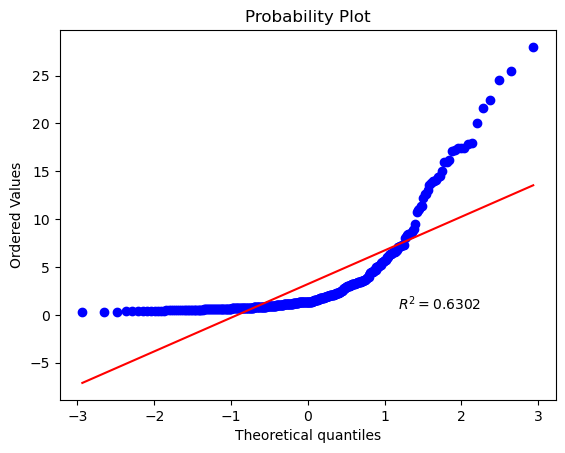

----------------------------
Cholesterol
Skewness: 3.408525855721416
Kurtosis: 14.337869865983716


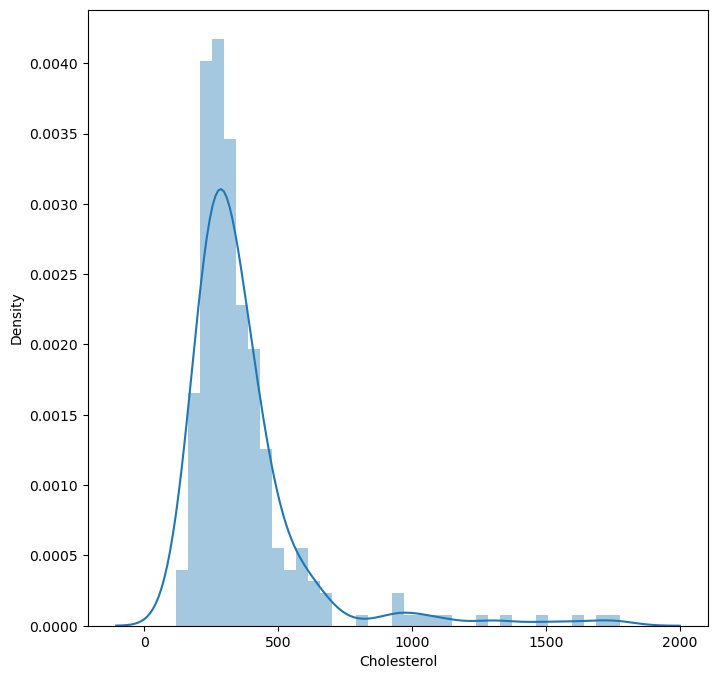

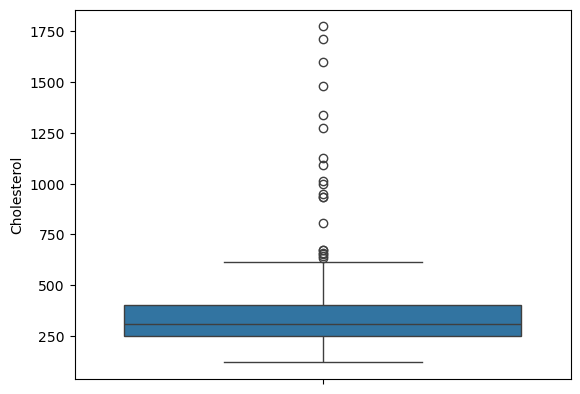

posx and posy should be finite values
posx and posy should be finite values


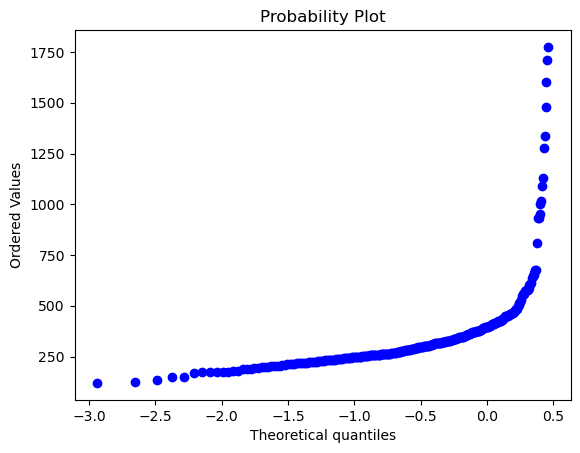

----------------------------
Albumin
Skewness: -0.4675265141762801
Kurtosis: 0.5667445291024173


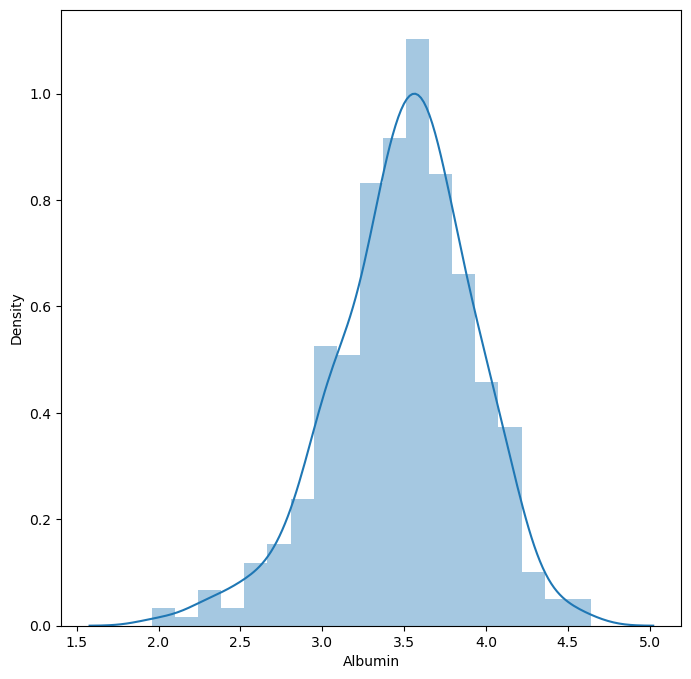

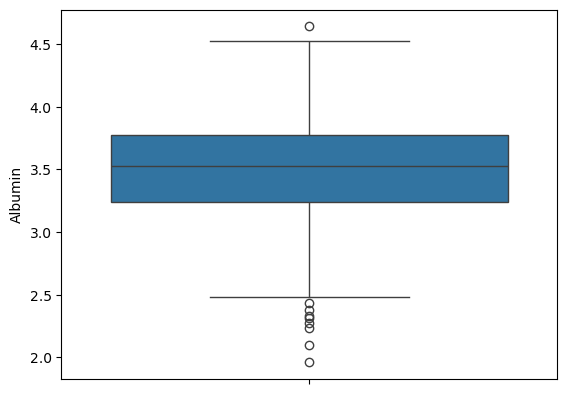

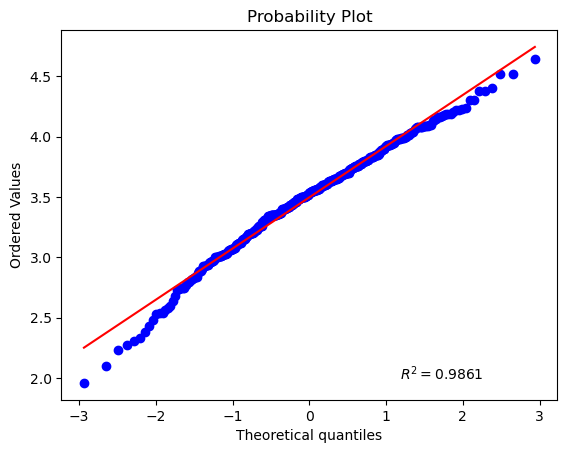

----------------------------
Copper
Skewness: 2.3036399957832616
Kurtosis: 7.624023449861701


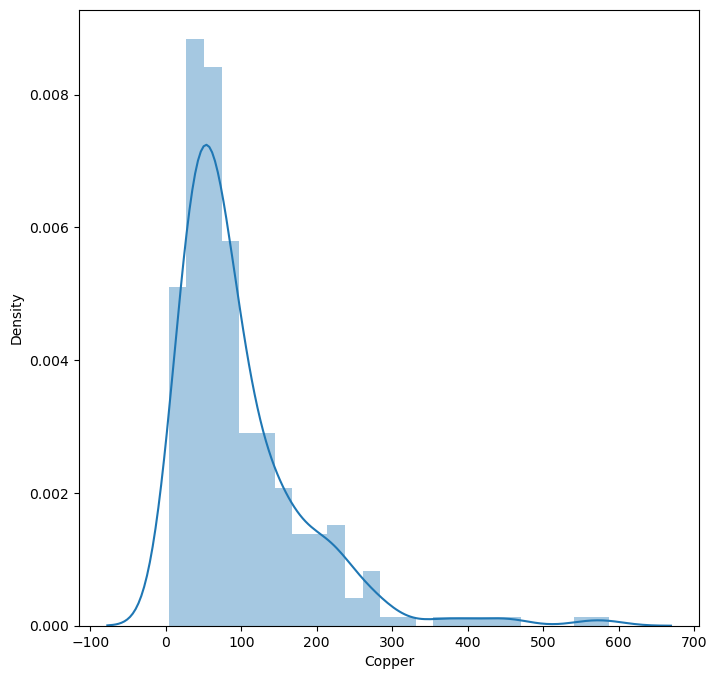

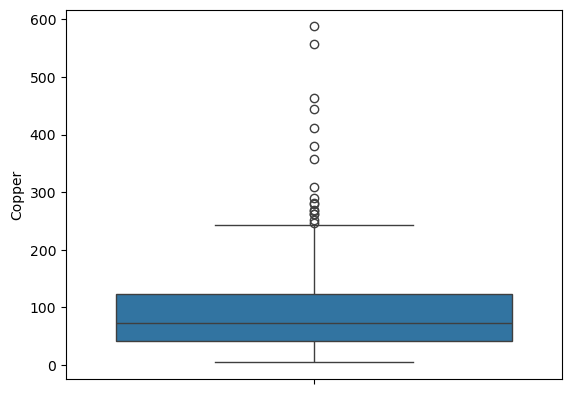

posx and posy should be finite values
posx and posy should be finite values


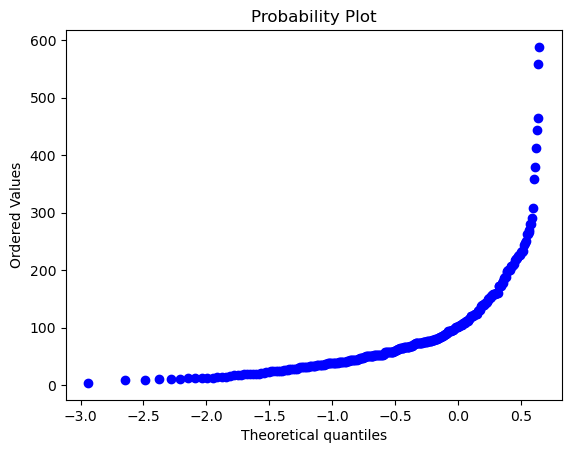

----------------------------
Alk_Phos
Skewness: 2.9928343153496115
Kurtosis: 9.662553460966153


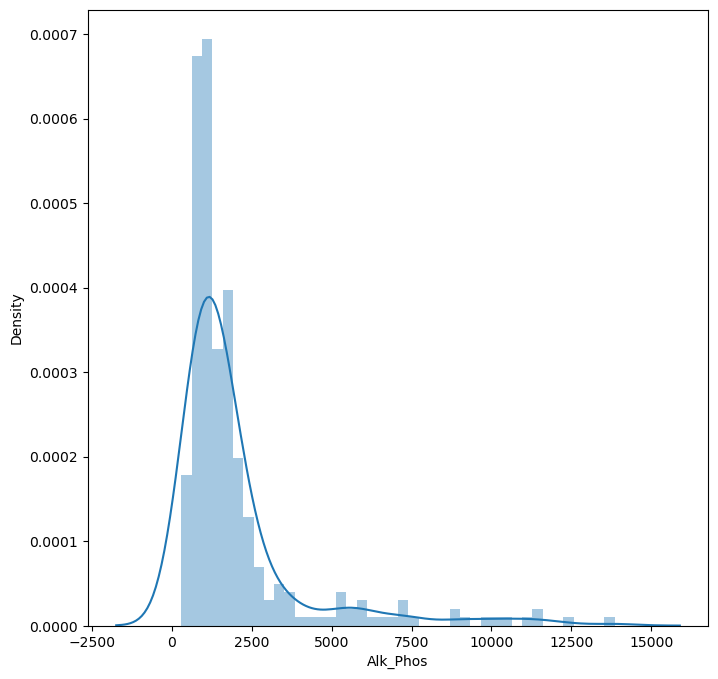

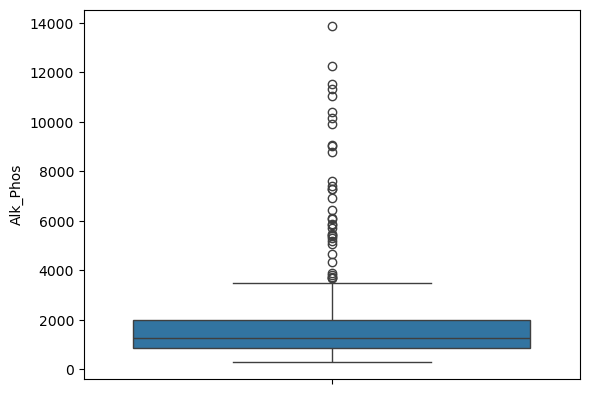

posx and posy should be finite values
posx and posy should be finite values


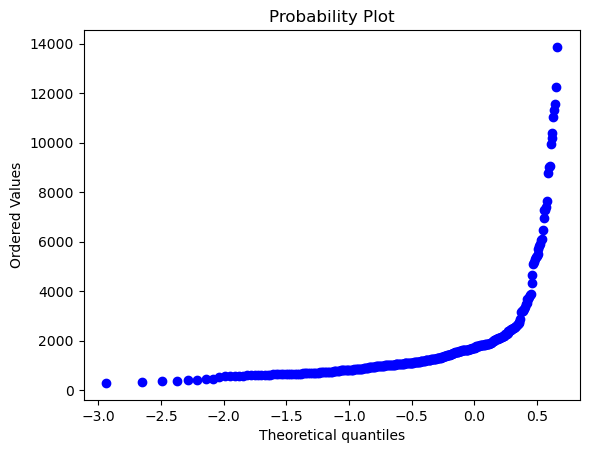

----------------------------
Sgot
Skewness: 1.4491969235882083
Kurtosis: 4.311975857605217


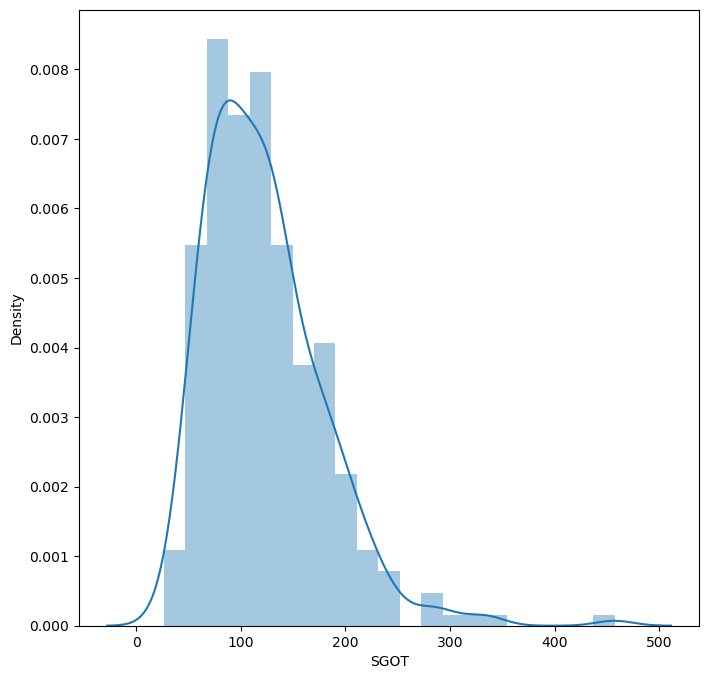

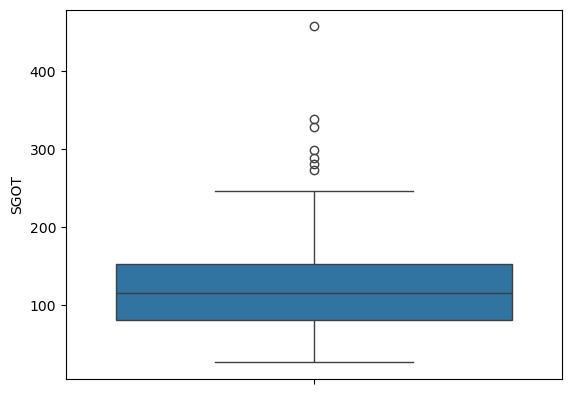

posx and posy should be finite values
posx and posy should be finite values


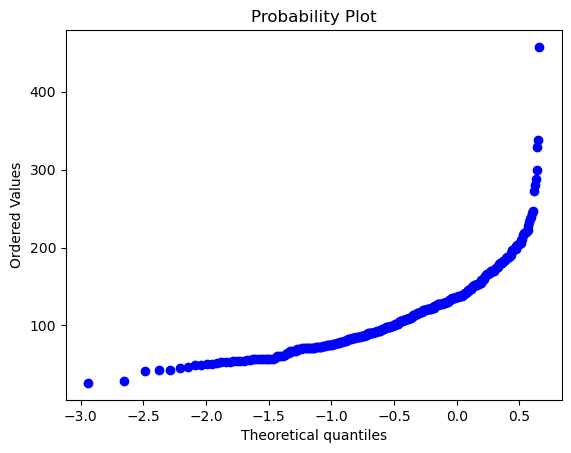

----------------------------
Tryglicerides
Skewness: 2.5239024664577845
Kurtosis: 11.802753128498216


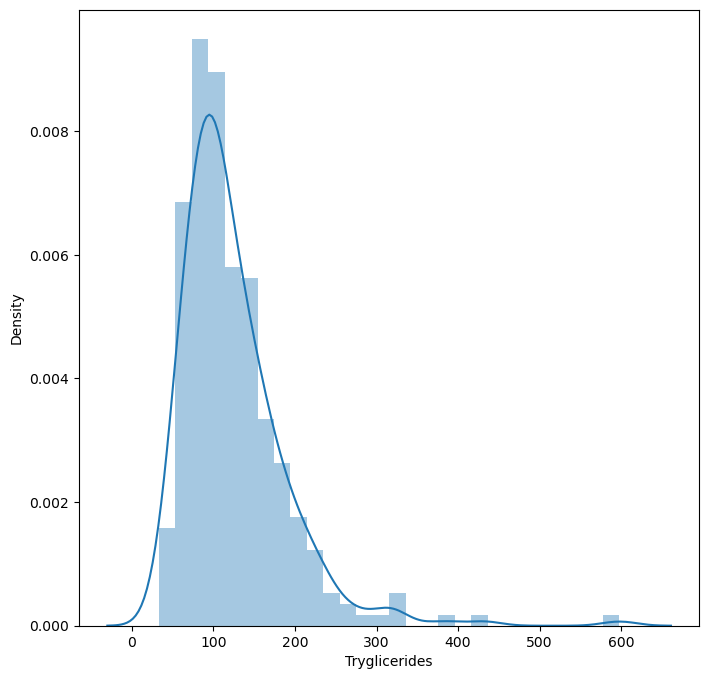

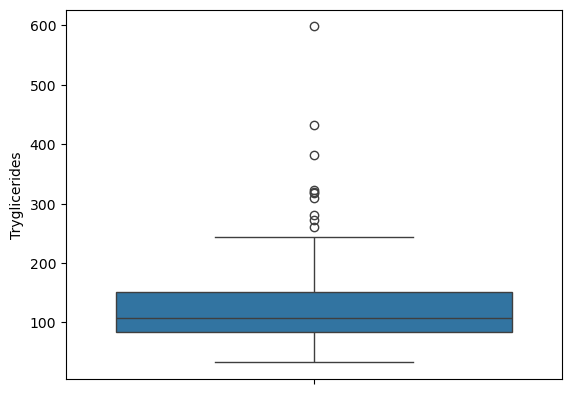

posx and posy should be finite values
posx and posy should be finite values


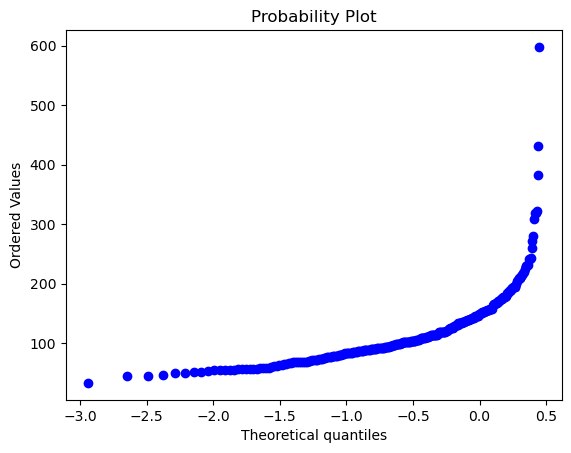

----------------------------
Platelets
Skewness: 0.6270977603715678
Kurtosis: 0.8630445578915271


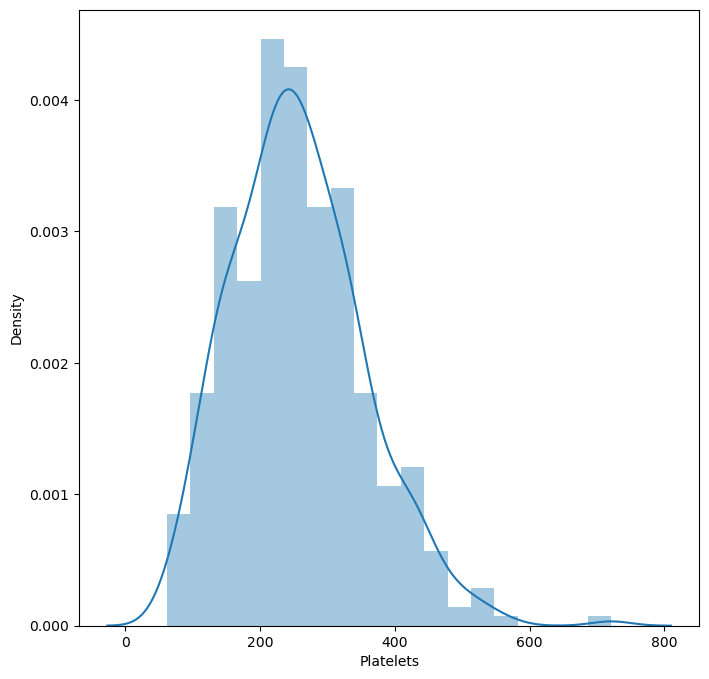

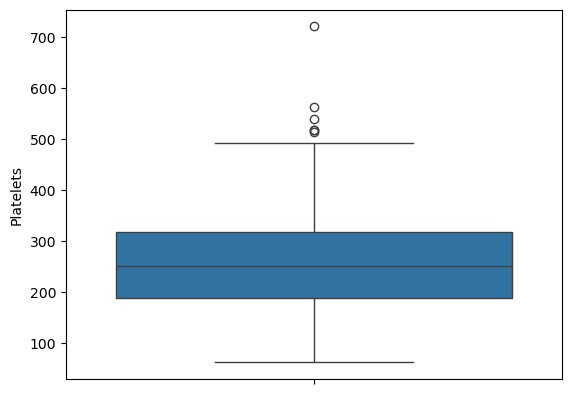

posx and posy should be finite values
posx and posy should be finite values


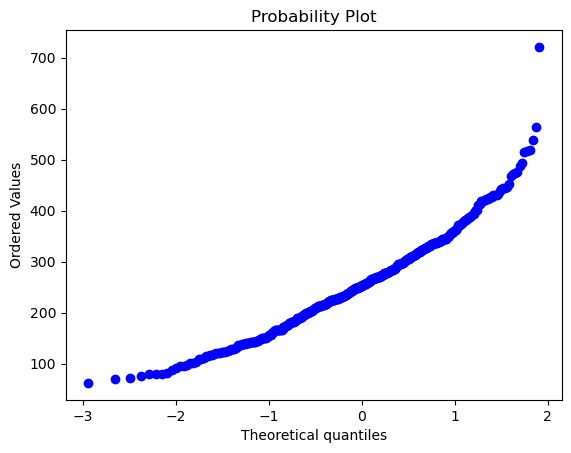

----------------------------
Prothrombin
Skewness: 2.223276154109735
Kurtosis: 10.040772735082795


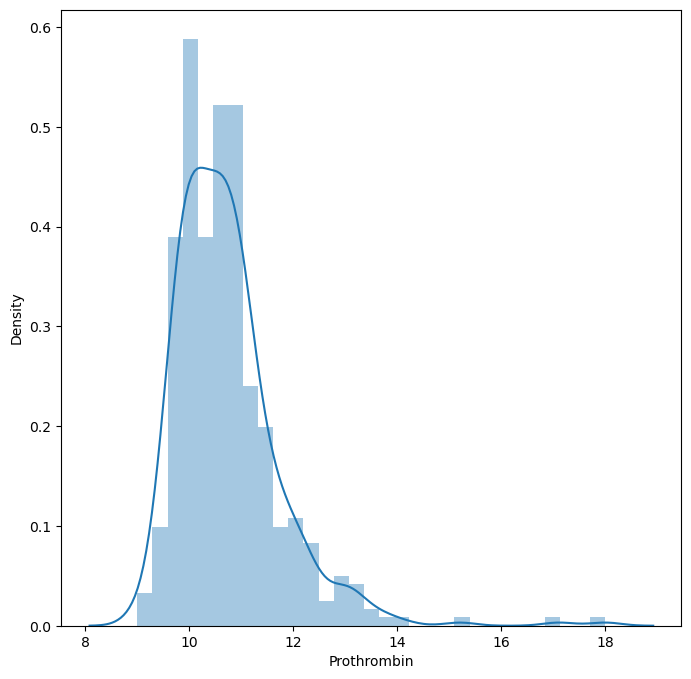

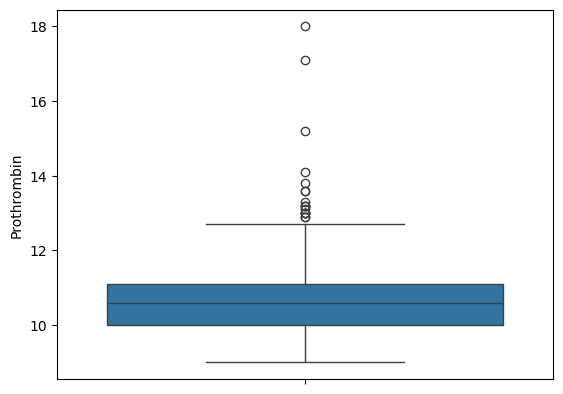

posx and posy should be finite values
posx and posy should be finite values


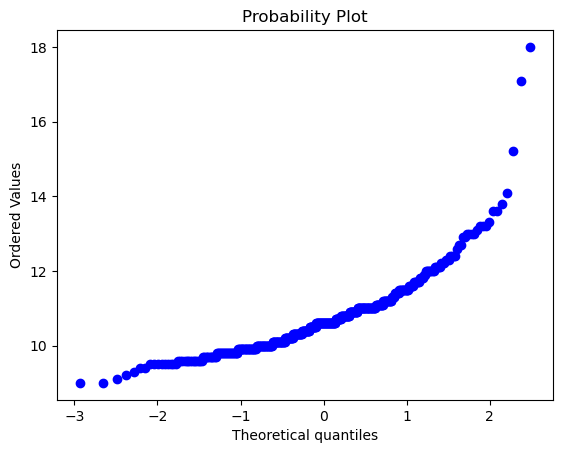

----------------------------


In [11]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if col not in ['Stage']:
            print(col.title())
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurtosis())
            plt.figure(figsize=(8,8))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(df[col])
            plt.show()
            scipy.stats.probplot(df[col],plot=plt,rvalue=True)
            plt.show()
            print('----------------------------')

The distributions of the features Bilirubin, Cholesterol, Copper, Alkaline Phosphatase, SGOT, Tryglicerides and Prothrombin are highly skewed and their kurtosis values are more significant as well. As a result, they are more prone to having outliers which is clearly indicated by their respective box plots.

In [12]:
def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()

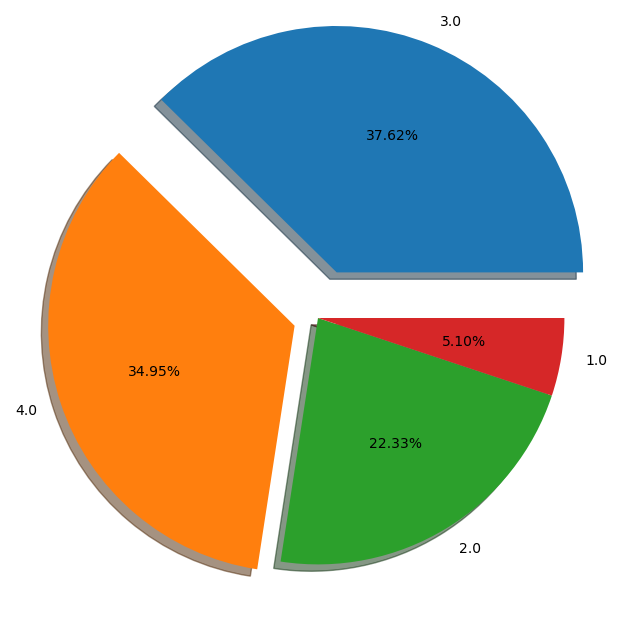

In [13]:
pie_chart(df,'Stage')

Majority of the patients had third histologic stage of Cirrhosis disease accounting for almost 38% of the total share, closely followed by those having 4th stage which comprised a share of about 35%. The proportion of the number of patients having 2nd stage of Cirrhosis disease stood at a little more than one-fifth of the total share. However, a tiny fraction of the total share was occupied by patients having the first histologic stage of the disease.

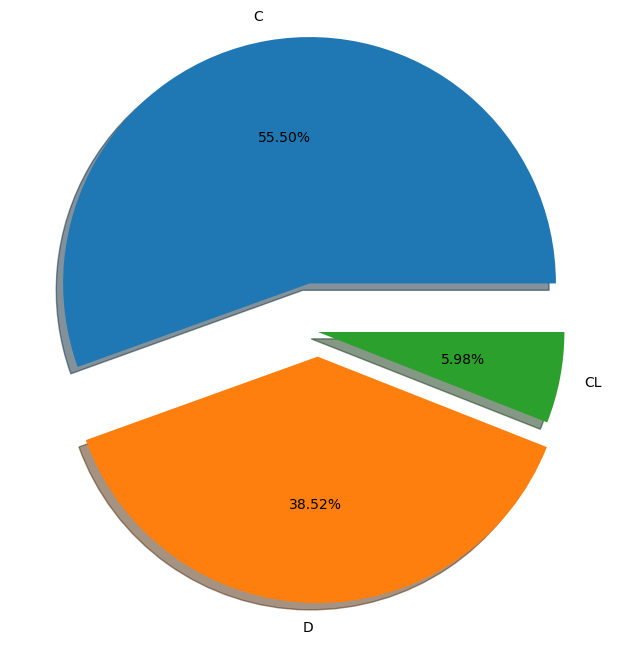

In [14]:
pie_chart(df,'Status')

A significant proportion of the entire population of patients had "Censored" status, contributing to a little more than half of the total share. They are followed by the patients who died during the course of the clinical trials, possessing a share of just less than 40%. Patients, having the status of "Censored due to Liver tx", had a minimal share of just over 5%.

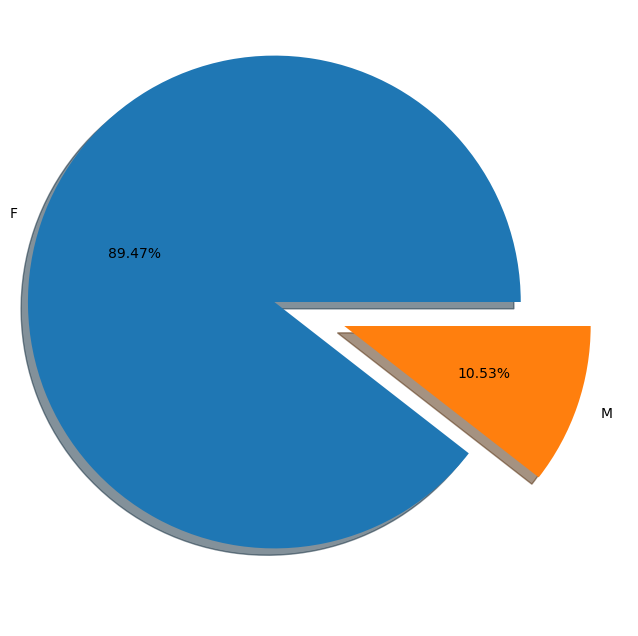

In [15]:
pie_chart(df,'Sex')

A vast majority of the entire population of patients are females, contributing to a substantial share of almost 90%. Males comprised a little more than one-tenth of the total share.

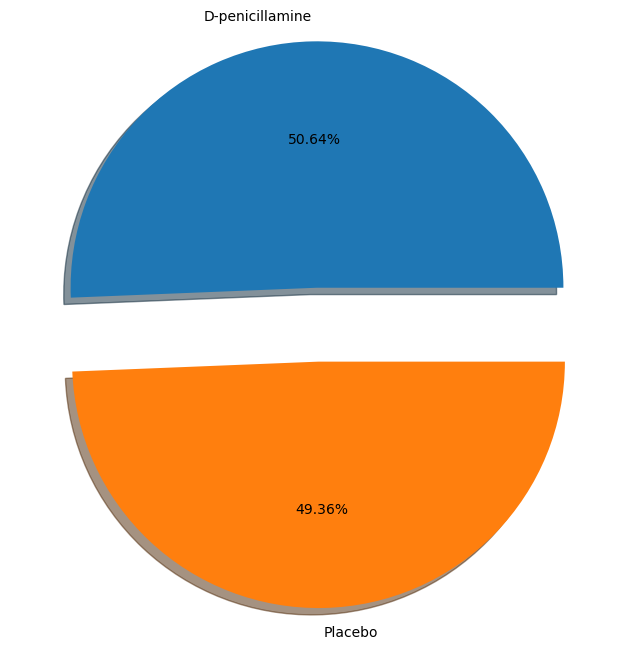

In [16]:
pie_chart(df,'Drug')

Both the drugs, D-penicillamine and Placebo, recorded an equal amount of usage during the clinical trials.

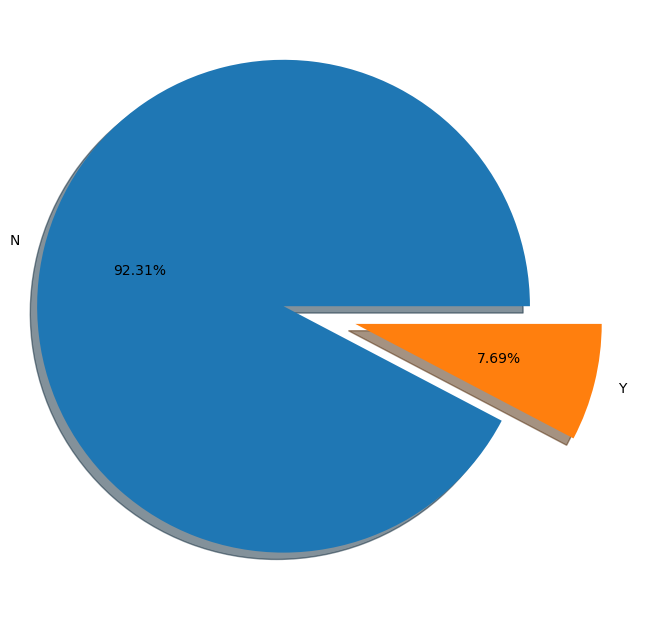

In [17]:
pie_chart(df,'Ascites')

## Only a tiny fraction of the population of patients had Ascites disease.

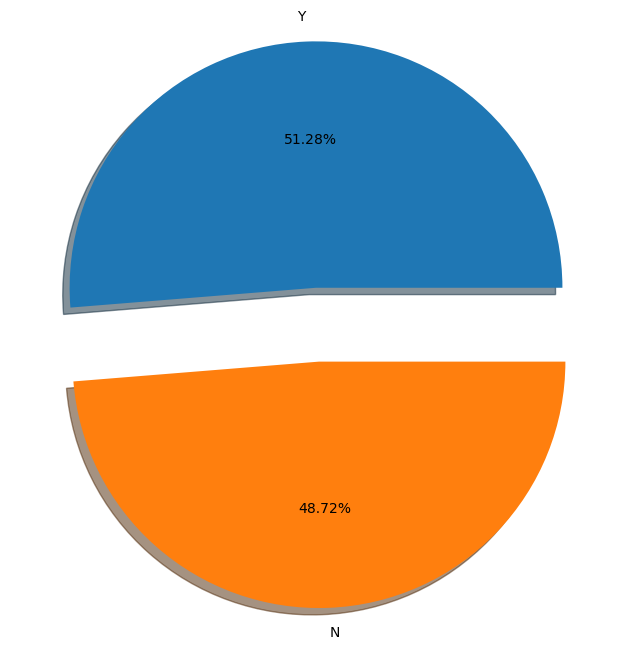

In [18]:
pie_chart(df,'Hepatomegaly')

## The percentage share of patients suffering from the Hepatomegaly disease and those who did not have this disease is almost similar.

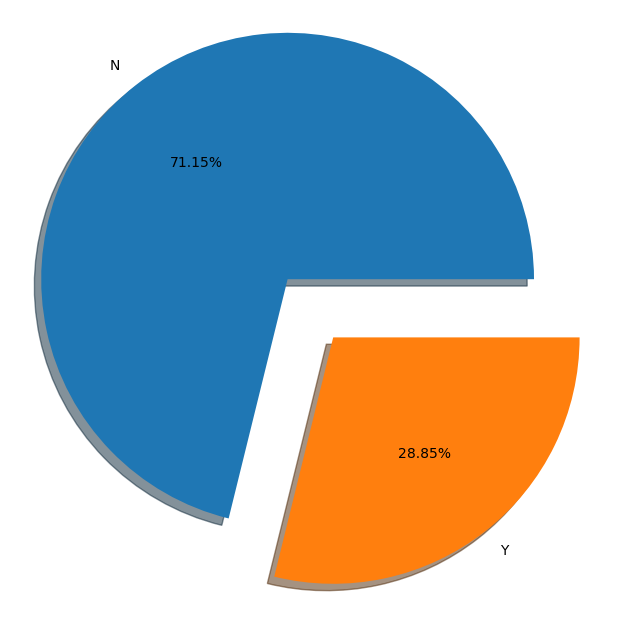

In [19]:
pie_chart(df,'Spiders')

Most of the patients did not have spiders contributing to a little more than 70% of the total share.

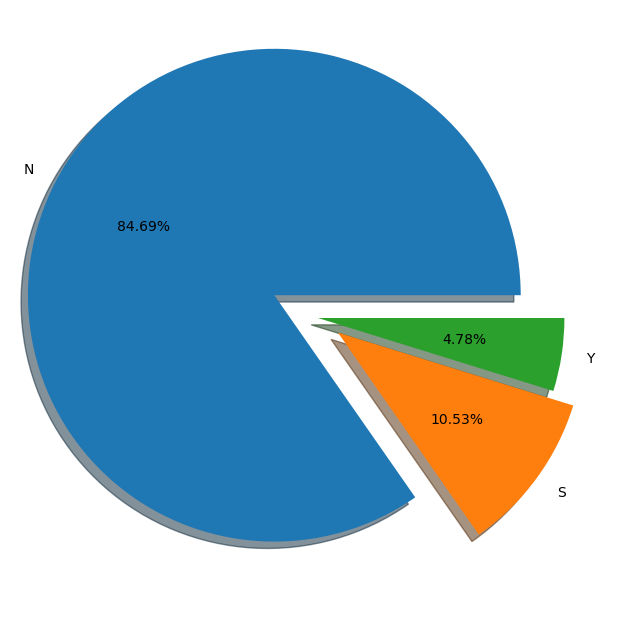

In [20]:
pie_chart(df,'Edema')

A lion's share of the population of patients neither had edema nor diuretic therapy for edema, contributing to almost 85% of the total share. The patients in case of which edema was present without diuretics or edema was resolved by diuretics had a share of 
just over one-tenth whereas those who had edema despite having diuretic therapy had a minimal share of a little less than 5%.

In [21]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(df.Stage)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')

It is clearly evident that the classes of the target feature "Stage" are highly imbalanced with 3rd stage being the majority class and 1st stage being the minority class. 

## Bivariate Analysis

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

There is a mild positive correlation between Bilirubin and Copper.

In [23]:
males = df[df.Sex == 'M']
females = df[df.Sex == 'F']

In [24]:
males.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,44.000000,44.000000,44.000000,35.000000,44.000000,36.000000,36.000000,36.000000,35.000000,43.000000,44.000000,44.000000
mean,1894.022727,20348.340909,2.865909,362.457143,3.535000,154.277778,2172.950000,121.990556,133.428571,231.139535,10.940909,3.068182
std,1213.034356,4009.641699,2.319477,178.993319,0.456598,100.665389,2418.446239,47.013095,52.168441,85.225634,0.931445,0.925045
min,140.000000,12227.000000,0.600000,151.000000,2.270000,13.000000,516.000000,46.500000,49.000000,70.000000,9.700000,1.000000
25%,1060.750000,17886.000000,1.300000,245.000000,3.327500,80.750000,852.000000,82.770000,91.000000,165.500000,10.275000,2.750000
50%,1507.000000,19724.000000,2.050000,317.000000,3.645000,134.500000,1116.000000,121.675000,126.000000,217.000000,10.900000,3.000000
75%,2715.750000,23588.750000,3.500000,426.500000,3.870000,211.750000,2313.000000,153.450000,163.000000,298.500000,11.225000,4.000000
max,4459.000000,28650.000000,9.500000,1000.000000,4.300000,444.000000,10396.800000,221.880000,242.000000,394.000000,14.100000,4.000000


In [25]:
females.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,374.000000,374.000000,374.000000,249.000000,374.000000,274.000000,276.000000,276.000000,247.000000,364.000000,372.000000,368.000000
mean,1920.577540,18319.823529,3.262567,370.502008,3.493021,90.208029,1957.834783,122.630145,123.465587,260.082418,10.706989,3.019022
std,1092.953174,3740.397415,4.591388,238.726563,0.421527,80.738377,2105.049047,57.916646,66.780963,99.418385,1.030534,0.877926
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1095.500000,15478.750000,0.700000,252.000000,3.240000,40.000000,877.500000,80.600000,84.000000,190.000000,10.000000,2.000000
50%,1773.000000,18333.000000,1.300000,309.000000,3.520000,67.000000,1270.500000,113.335000,106.000000,252.500000,10.600000,3.000000
75%,2606.250000,20819.000000,3.400000,395.000000,3.767500,111.750000,1963.750000,151.900000,146.000000,319.000000,11.100000,4.000000
max,4795.000000,28018.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


Females tend to have more quantities of Bilirubin, Cholesterol, SGOT and Platelets as compared to males whereas males are more likely to have higher quantities of Albumin, Copper, Alkaline Phosphatase and Tryglicerides in comparison to their female counterparts.

In [26]:
round(males.Status.value_counts() / len(males) * 100,2)

Status
D     54.55
C     38.64
CL     6.82
Name: count, dtype: float64

In [27]:
round(females.Status.value_counts() / len(females) * 100,2)

Status
C     57.49
D     36.63
CL     5.88
Name: count, dtype: float64

Male patients are more prone to death in comparison to females while female patients are more likely to have "Censored" status.

In [28]:
round(males.Stage.value_counts() / len(males) * 100,2)

Stage
4.0    38.64
3.0    36.36
2.0    18.18
1.0     6.82
Name: count, dtype: float64

In [29]:
round(females.Stage.value_counts() / len(females) * 100,2)

Stage
3.0    37.17
4.0    33.96
2.0    22.46
1.0     4.81
Name: count, dtype: float64

Male patients are highly vulnerable to the critical stages (i.e. 3rd and 4th) of the Cirrhosis disease as compared to female patients.

In [30]:
round(males.Hepatomegaly.value_counts() / len(males) * 100,2)

Hepatomegaly
Y    47.73
N    34.09
Name: count, dtype: float64

In [31]:
round(females.Hepatomegaly.value_counts() / len(females) * 100,2)

Hepatomegaly
Y    37.17
N    36.63
Name: count, dtype: float64

Male patients are more likely to suffer from Hepatomegaly disease in comparison to female patients.

## Multivariate Analysis

In [33]:
# plt.figure(figsize=(12,8))
# sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)

There are no major correlations between any pair of features in the dataset.

In [34]:
sns.pairplot(df,hue='Stage')

Most of the numerical features such as Bilirubin, Prothrombin, Triglycerides, etc. follow the Gaussian distribution so their missing values can be imputed with their corresponding median values.

In [35]:
sns.clustermap(df.corr())

ValueError: could not convert string to float: 'D'

## Feature Engineering

In [36]:
df.Age = (df.Age.values/365.0).round()
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### Imputation of missing values

In [37]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

### Treatment of outliers

In [38]:
for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))

### Encoding of categorical features

In [39]:
df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)

## Separating the independent predictor features and the target label

### We will not be using 'Status' and 'N_days' as our features since they will cause data leakage.

In [40]:
X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage

## Balancing the imbalanced target column "Stage" using Synthetic Minority Over-Sampling Technique(SMOTE)

In [41]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)

In [42]:
sns.countplot(y)

<Axes: xlabel='Prothrombin', ylabel='Density'>

## Feature Scaling

In [43]:
scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,-0.749905,0.923550,-0.368206,4.868693,0.958693,2.204093,3.184618,2.441411,-0.680219,-2.530955,1.846216,0.540979,0.650103,2.051617,-0.837085,1.948828
1,-0.749905,0.613307,-0.368206,-0.216116,0.958693,2.204093,0.156355,-0.509652,-0.114382,1.538092,-0.539209,2.110302,0.025515,-0.703724,-0.493093,-0.052717
2,-0.749905,2.061109,3.131062,-0.216116,-1.111291,-0.488920,-2.871908,-0.366858,-1.853295,-0.205785,2.290560,-1.295755,-0.419852,-1.786180,-1.269849,1.698635
3,-0.749905,0.509892,-0.368206,-0.216116,0.958693,2.204093,-2.871908,-0.176467,-0.914834,-2.689489,-0.305344,2.110302,-1.326694,-0.572518,-0.914761,-0.428006
4,1.491120,-1.248154,-0.368206,-0.216116,0.958693,2.204093,0.156355,0.585097,-0.431802,-0.073674,1.542191,-1.058905,0.016055,-1.228551,-1.436297,0.322573


## Model Training & Evaluation

## Dividing the dataset into training and test sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Logistic Regression

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.52      0.64      0.58        50
           2       0.27      0.17      0.21        52
           3       0.30      0.44      0.36        39
           4       0.77      0.64      0.70        53

    accuracy                           0.47       194
   macro avg       0.47      0.47      0.46       194
weighted avg       0.48      0.47      0.47       194



In [48]:
# plot_confusion_matrix(logmodel,X_test,y_test)

In [49]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [50]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           1       0.63      0.82      0.71        50
           2       0.67      0.54      0.60        52
           3       0.36      0.41      0.38        39
           4       0.67      0.53      0.59        53

    accuracy                           0.58       194
   macro avg       0.58      0.57      0.57       194
weighted avg       0.59      0.58      0.58       194



In [51]:
# plot_confusion_matrix(svm,X_test,y_test)

In [52]:
scores = []
for i in np.arange(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

In [55]:
plt.figure(figsize=(12,8))
sns.lineplot(scores)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')

Text(0, 0.5, 'Accuracy Score')

In [56]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [57]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[38  2  9  1]
 [23 19  8  2]
 [12 12 11  4]
 [10  9 15 19]]
              precision    recall  f1-score   support

           1       0.46      0.76      0.57        50
           2       0.45      0.37      0.40        52
           3       0.26      0.28      0.27        39
           4       0.73      0.36      0.48        53

    accuracy                           0.45       194
   macro avg       0.47      0.44      0.43       194
weighted avg       0.49      0.45      0.44       194



In [58]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)

SGDClassifier()

In [59]:
sgd_pred = sgd.predict(X_test)
print(confusion_matrix(y_test,sgd_pred))
print(classification_report(y_test,sgd_pred))

[[36  6  2  6]
 [29 15  4  4]
 [16 12  2  9]
 [ 6 11 10 26]]
              precision    recall  f1-score   support

           1       0.41      0.72      0.53        50
           2       0.34      0.29      0.31        52
           3       0.11      0.05      0.07        39
           4       0.58      0.49      0.53        53

    accuracy                           0.41       194
   macro avg       0.36      0.39      0.36       194
weighted avg       0.38      0.41      0.38       194



In [60]:
pac = PassiveAggressiveClassifier()
pac.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [61]:
pac_pred = pac.predict(X_test)
print(confusion_matrix(y_test,pac_pred))
print(classification_report(y_test,pac_pred))

[[31  5  7  7]
 [27 10 14  1]
 [15  9 15  0]
 [10 21 13  9]]
              precision    recall  f1-score   support

           1       0.37      0.62      0.47        50
           2       0.22      0.19      0.21        52
           3       0.31      0.38      0.34        39
           4       0.53      0.17      0.26        53

    accuracy                           0.34       194
   macro avg       0.36      0.34      0.32       194
weighted avg       0.36      0.34      0.31       194



In [62]:
ridge = RidgeClassifier()
ridge.fit(X_train,y_train)

RidgeClassifier()

In [63]:
ridge_pred = ridge.predict(X_test)
print(confusion_matrix(y_test,ridge_pred))
print(classification_report(y_test,ridge_pred))

[[33  4 11  2]
 [25  4 19  4]
 [ 9  5 17  8]
 [ 4  6  8 35]]
              precision    recall  f1-score   support

           1       0.46      0.66      0.55        50
           2       0.21      0.08      0.11        52
           3       0.31      0.44      0.36        39
           4       0.71      0.66      0.69        53

    accuracy                           0.46       194
   macro avg       0.42      0.46      0.43       194
weighted avg       0.43      0.46      0.43       194



In [64]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[40  3  6  1]
 [11 24 14  3]
 [ 4  6 16 13]
 [ 8  7 13 25]]
              precision    recall  f1-score   support

           1       0.63      0.80      0.71        50
           2       0.60      0.46      0.52        52
           3       0.33      0.41      0.36        39
           4       0.60      0.47      0.53        53

    accuracy                           0.54       194
   macro avg       0.54      0.54      0.53       194
weighted avg       0.55      0.54      0.54       194



In [66]:
scores = []
for i in np.arange(100,1001,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))

In [68]:
# plt.figure(figsize=(12,8))
# sns.lineplot(np.arange(100,1001,100),scores)
# plt.xlabel('No. of Estimators',labelpad=15)
# plt.ylabel('Accuracy Score',labelpad=15)

In [69]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [70]:
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[46  1  2  1]
 [ 3 34 12  3]
 [ 7  7 19  6]
 [ 1  5 14 33]]
              precision    recall  f1-score   support

           1       0.81      0.92      0.86        50
           2       0.72      0.65      0.69        52
           3       0.40      0.49      0.44        39
           4       0.77      0.62      0.69        53

    accuracy                           0.68       194
   macro avg       0.68      0.67      0.67       194
weighted avg       0.69      0.68      0.68       194



In [71]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')

<Axes: xlabel='Importance', ylabel='Feature'>

In [72]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)

ExtraTreesClassifier()

In [73]:
et_pred = et.predict(X_test)
print(confusion_matrix(y_test,et_pred))
print(classification_report(y_test,et_pred))

[[49  1  0  0]
 [ 5 31 12  4]
 [ 7  7 16  9]
 [ 1  5 18 29]]
              precision    recall  f1-score   support

           1       0.79      0.98      0.88        50
           2       0.70      0.60      0.65        52
           3       0.35      0.41      0.38        39
           4       0.69      0.55      0.61        53

    accuracy                           0.64       194
   macro avg       0.63      0.63      0.63       194
weighted avg       0.65      0.64      0.64       194



In [76]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

In [79]:
y_train

214    3
74     4
375    3
364    3
61     4
      ..
129    3
144    3
72     1
235    3
37     4
Name: Stage, Length: 450, dtype: int64

In [84]:
xgb_pred = xgb.predict(X_test)
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[47  3  0  0]
 [12 26 11  3]
 [ 7  6 19  7]
 [ 2  8 10 33]]
              precision    recall  f1-score   support

           1       0.69      0.94      0.80        50
           2       0.60      0.50      0.55        52
           3       0.47      0.49      0.48        39
           4       0.77      0.62      0.69        53

    accuracy                           0.64       194
   macro avg       0.63      0.64      0.63       194
weighted avg       0.65      0.64      0.64       194



## Model Performance Analysis

In [85]:
print("Accuracy Score of Logistic Regression:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Passive Aggressive Classifier:",str(np.round(pac.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of SGD Classifer:",str(np.round(sgd.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ridge Classifier:",str(np.round(ridge.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gaussian Naive Bayes:",str(np.round(gnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bernoulli Naive Bayes:",str(np.round(bnb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rf.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of XG Boost Classifier:",str(np.round(xgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Cat Boost Classifier:",str(np.round(cb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Gradient Boosting Classifier:",str(np.round(gbc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Histogram Gradient Boosting Classifier:",str(np.round(hgb.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Bagging Classifier:",str(np.round(bag.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Ada Boost Classifier:",str(np.round(abc.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Extra Trees Classifier:",str(np.round(et.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Light GBM Classifier:",str(np.round(lgbm.score(X_test,y_test)*100,2)) + '%')

Accuracy Score of Logistic Regression: 50.52%
Accuracy Score of Passive Aggressive Classifier: 36.6%
Accuracy Score of SGD Classifer: 43.3%
Accuracy Score of Ridge Classifier: 48.97%
Accuracy Score of Gaussian Naive Bayes: 41.24%
Accuracy Score of Bernoulli Naive Bayes: 45.36%
Accuracy Score of K Neighbors Classifier: 46.91%
Accuracy Score of Support Vector Classifier: 60.82%
Accuracy Score of Decision Tree Classifier: 57.22%
Accuracy Score of Random Forest Classifier: 65.98%
Accuracy Score of XG Boost Classifier: 64.43%
Accuracy Score of Cat Boost Classifier: 70.62%
Accuracy Score of Gradient Boosting Classifier: 63.92%
Accuracy Score of Histogram Gradient Boosting Classifier: 67.53%
Accuracy Score of Bagging Classifier: 56.19%
Accuracy Score of Ada Boost Classifier: 48.45%
Accuracy Score of Extra Trees Classifier: 65.46%
Accuracy Score of Light GBM Classifier: 65.46%


Cat Boost Classifier is the best performing model that boasts a superb prediction accuracy of more than 70%.

## Hyperparameter Tuning using GridSearchCV and other cross validation techniques

In [77]:
rf_cv = cross_val_score(rf,X_test,y_test,cv=10,verbose=1,scoring='accuracy')
print("Mean Accuracy Score of Random Forest Classifier:",str(np.round(np.mean(rf_cv)*100,2)) + '%')

Mean Accuracy Score of Random Forest Classifier: 60.74%


## Saving the model for future use

In [109]:
joblib.dump(cb,'model.pkl')

['model.pkl']

In [110]:
model = joblib.load('model.pkl')
model

In [111]:
joblib.dump(scaler,'scaler.bin')

['scaler.bin']

In [112]:
scaler = joblib.load('scaler.bin')
scaler

StandardScaler()